In [4]:
import pandas as pd
import numpy as np
import matplotlib; import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

matplotlib.rc('font',family = 'NanumGothicCoding')

In [6]:
df_raw = pd.read_csv('./data/직무능력평가.csv', engine='python')
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


In [7]:
df_raw_x = df_raw.drop('EVAL', axis=1)
df_raw_y = df_raw['EVAL']
df_raw_x.head()

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,51,30,39,61,92,45
1,64,51,54,63,73,47
2,70,68,69,76,86,48
3,63,45,47,54,84,35
4,78,56,66,71,83,47


In [8]:
df_raw_x.describe().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
count,30.000,30.000,30.000,30.000,30.000,30.000
mean,66.600,53.133,56.367,64.633,74.767,42.933
std,13.315,12.235,11.737,10.397,9.895,10.289
min,37.000,30.000,34.000,43.000,49.000,25.000
25%,58.500,45.000,47.000,58.250,69.250,35.000
50%,65.000,51.500,56.500,63.500,77.500,41.000
75%,77.000,62.500,66.750,71.000,80.000,47.750
max,90.000,83.000,75.000,88.000,92.000,72.000


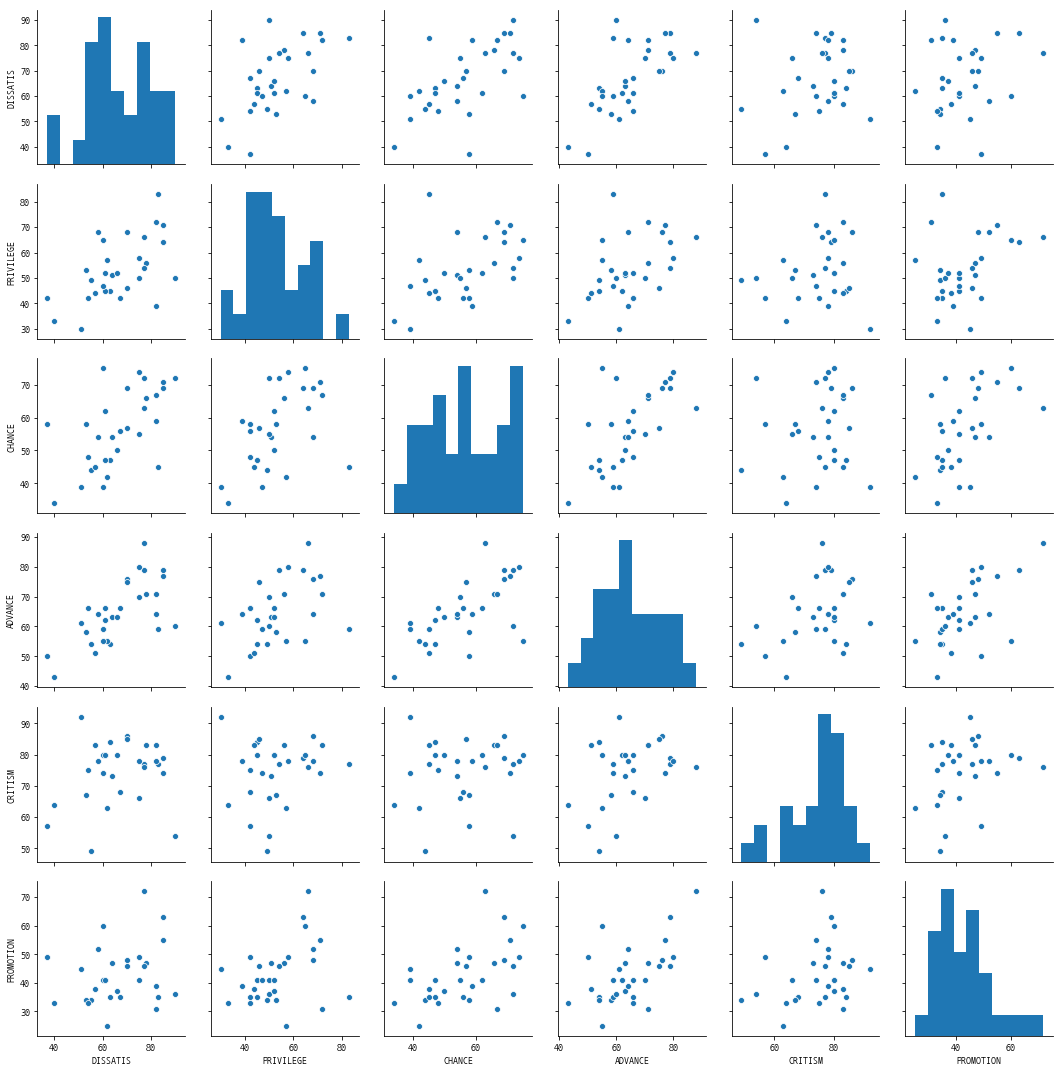

In [9]:
sns.pairplot(df_raw_x)

In [10]:
df_raw_x.corr().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
DISSATIS,1.000,0.558,0.597,0.669,0.188,0.225
PRIVILEGE,0.558,1.000,0.493,0.445,0.147,0.343
CHANCE,0.597,0.493,1.000,0.640,0.116,0.532
ADVANCE,0.669,0.445,0.640,1.000,0.377,0.574
CRITISM,0.188,0.147,0.116,0.377,1.000,0.283
PROMOTION,0.225,0.343,0.532,0.574,0.283,1.000


In [11]:
x_cols = df_raw_x.columns
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x)
print('Scaled Data : \n {}'.format(nd_scaled[:5].round(3)))
print('Shape : \n {}'.format(nd_scaled.shape))

Scaled Data : 
 [[-1.192 -1.923 -1.505 -0.355  1.771  0.204]
 [-0.199 -0.177 -0.205 -0.16  -0.182  0.402]
 [ 0.26   1.236  1.095  1.112  1.155  0.501]
 [-0.275 -0.676 -0.812 -1.04   0.949 -0.784]
 [ 0.871  0.238  0.835  0.623  0.846  0.402]]
Shape : 
 (30, 6)


In [12]:
df_scaled = pd.DataFrame(nd_scaled,columns=x_cols)
df_scaled.head().round(3)
df_scaled.describe().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
count,30.000,30.000,30.000,30.000,30.000,30.000
mean,0.000,-0.000,-0.000,-0.000,0.000,0.000
std,1.017,1.017,1.017,1.017,1.017,1.017
min,-2.261,-1.923,-1.938,-2.116,-2.649,-1.773
25%,-0.619,-0.676,-0.812,-0.624,-0.567,-0.784
50%,-0.122,-0.136,0.012,-0.111,0.281,-0.191
75%,0.794,0.779,0.900,0.623,0.538,0.476
max,1.787,2.483,1.615,2.286,1.771,2.873


In [13]:
pca = PCA(n_components=6)
nd_pca = pca.fit_transform(df_scaled)
print('PCA Data : \n {}'.format(nd_pca[:5]))
print('Shape : \n {}'.format(nd_pca.shape))

PCA Data : 
 [[ 1.67606983 -2.73856419 -0.12843595 -0.50321261  0.24330658  0.22576117]
 [ 0.21834397 -0.12615302  0.43115839  0.08726221  0.19566103  0.1941439 ]
 [-2.10515127 -0.51500683 -0.27683087  0.49131136 -0.44691698 -0.63174369]
 [ 1.35994032 -0.86064574 -0.91799066  0.03173793 -0.40137177  0.44095403]
 [-1.5120347  -0.35277019 -0.32684445 -0.32877858 -0.32709718  0.21246099]]
Shape : 
 (30, 6)


In [14]:
df_pca = pd.DataFrame(nd_pca, columns=['Prin1','Prin2','Prin3','Prin4','Prin5','Prin6',])
df_pca.head()

,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,1.676070,-2.738564,-0.128436,-0.503213,0.243307,0.225761
1,0.218344,-0.126153,0.431158,0.087262,0.195661,0.194144
2,-2.105151,-0.515007,-0.276831,0.491311,-0.446917,-0.631744
3,1.359940,-0.860646,-0.917991,0.031738,-0.401372,0.440954
4,-1.512035,-0.352770,-0.326844,-0.328779,-0.327097,0.212461


In [28]:
df_pca_stat = pd.DataFrame()
df_pca_stat['PrinNo'] = [I for I in range(1,7)]
df_pca_stat['EigenValues'] = pca.explained_variance_
df_pca_stat['EigenValueRatio'] = pca.explained_variance_ratio_
df_pca_stat['CumEigenValueRatio'] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,3.279,0.528,0.528
1,2,1.041,0.168,0.696
2,3,0.789,0.127,0.823
3,4,0.572,0.092,0.915
4,5,0.328,0.053,0.968
5,6,0.198,0.032,1.000


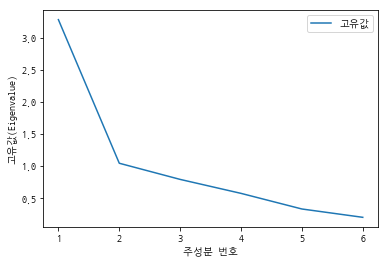

In [19]:
plt.plot(df_pca_stat['PrinNo'], df_pca_stat['EigenValues'], label='고유값')
plt.ylabel('고유값(Eigenvalue)')
plt.xlabel('주성분 번호')
plt.legend(loc='bset')

In [27]:
df_pca_stat.head()

,PrinNo,EigenValues,EngenValueRatio,CumEigenValueRatio
0,1,3.278507,0.528204,0.528204
1,2,1.041048,0.167724,0.695928
2,3,0.789216,0.127151,0.823080
3,4,0.571569,0.092086,0.915166
4,5,0.328186,0.052874,0.968040


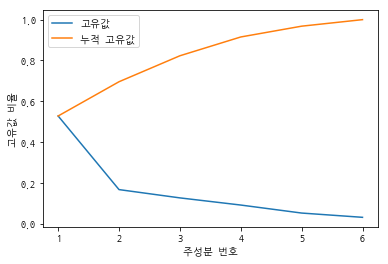

In [29]:
plt.plot(df_pca_stat['PrinNo'],
        df_pca_stat['EigenValueRatio'], label = '고유값')

plt.plot(df_pca_stat['PrinNo'],
        df_pca_stat['CumEigenValueRatio'], label = '누적 고유값')
plt.ylabel('고유값 비율')
plt.xlabel('주성분 번호')
plt.legend(loc='best')

In [31]:
x_cols = pd.DataFrame({'Feature':df_raw_x.columns})
df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T*-1, 
                                                columns = ['Prin1','Prin2','Prin3','Prin4','Prin5','Prin6',])], axis=1)
df_eigenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,DISSATIS,0.439,-0.313,0.445,0.316,-0.192,-0.612
1,PRIVILEGE,0.395,-0.309,0.217,-0.815,-0.038,0.190
2,CHANCE,0.461,-0.217,-0.272,0.225,0.776,0.118
3,ADVANCE,0.493,0.116,0.006,0.365,-0.460,0.631
4,CRITISM,0.225,0.802,0.457,-0.100,0.289,-0.058
5,PROMOTION,0.381,0.321,-0.687,-0.206,-0.255,-0.416


,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
Prin1,1.0,0.0,-0.0,-0.0,-0.0,0.0
Prin2,0.0,1.0,0.0,-0.0,-0.0,0.0
Prin3,-0.0,0.0,1.0,0.0,0.0,-0.0
Prin4,-0.0,-0.0,0.0,1.0,-0.0,-0.0
Prin5,-0.0,-0.0,0.0,-0.0,1.0,-0.0
Prin6,0.0,0.0,-0.0,-0.0,-0.0,1.0


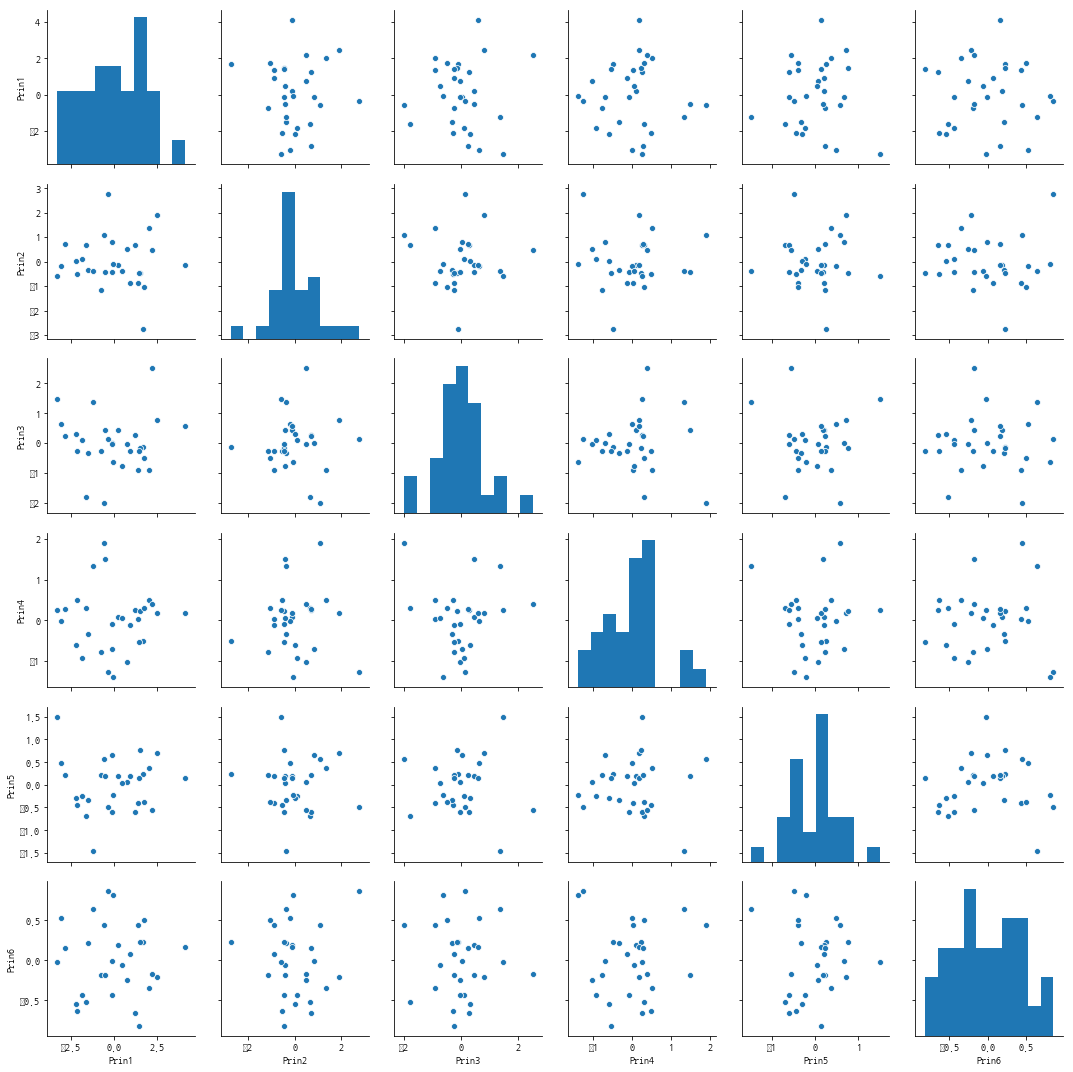

In [32]:
sns.pairplot(df_pca)
df_pca.corr().round(3)

In [33]:
df_raw_x_const = sm.add_constant(df_raw_x)
reg_model = sm.OLS(df_raw_y, df_raw_x_const)
reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     10.50
Date:                Thu, 09 May 2019   Prob (F-statistic):           1.24e-05
Time:                        11:55:04   Log-Likelihood:                -97.250
No. Observations:                  30   AIC:                             208.5
Df Residuals:                      23   BIC:                             218.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7871     11.589      0.931      0.3

In [34]:
x_var = ['Prin1', 'Prin2', 'Prin3']
df_pca_const = sm.add_constant(df_pca[x_var])
reg_model = sm.OLS(df_raw_y, df_pca_const)
reg_model = reg_model.fit()
print(reg_model.summary())



                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     14.36
Date:                Thu, 09 May 2019   Prob (F-statistic):           1.02e-05
Time:                        11:58:43   Log-Likelihood:                -102.38
No. Observations:                  30   AIC:                             212.8
Df Residuals:                      26   BIC:                             218.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.6333      1.440     44.890      0.0

## PCA 실습

In [35]:
df_raw = pd.read_csv('./data/IRIS.csv', engine='python')
df_raw.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


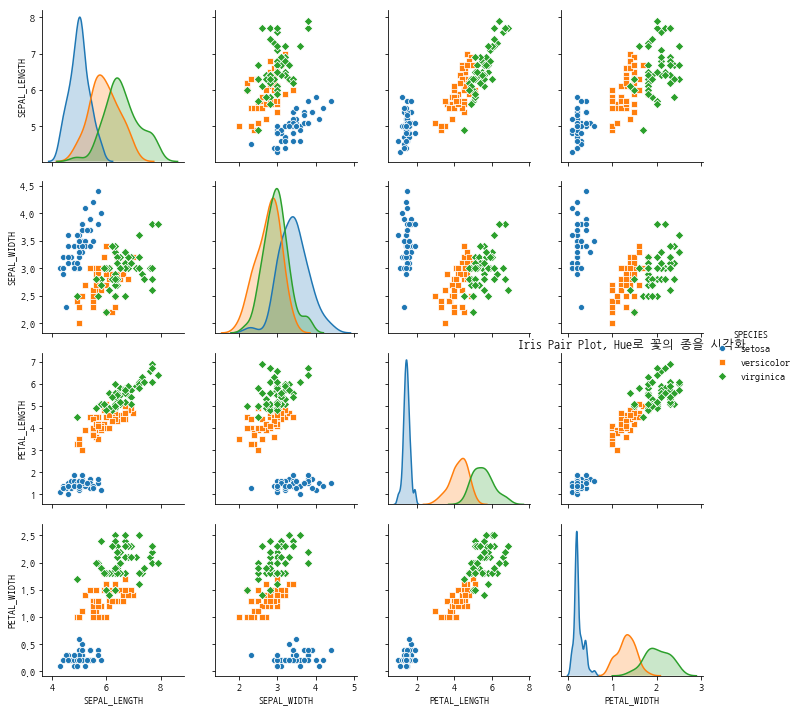

In [40]:
sns.pairplot(df_raw, hue="SPECIES", markers=["o", "s", "D"])
plt.title("Iris Pair Plot, Hue로 꽃의 종을 시각화")
plt.show()

In [36]:
df_raw_x = df_raw.drop('SPECIES', axis=1)
df_raw_y = df_raw['SPECIES']
df_raw_x.head()
df_raw_x.describe().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
count,150.000,150.000,150.000,150.000
mean,5.843,3.057,3.758,1.199
std,0.828,0.436,1.765,0.762
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500


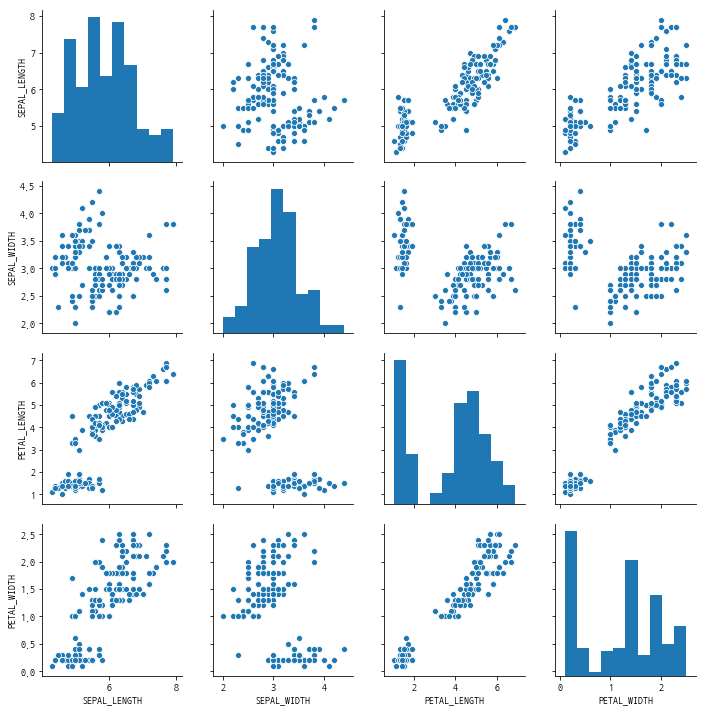

In [37]:
sns.pairplot(df_raw_x)

In [50]:
x_cols = df_raw_x.columns
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x)
print('Scaled Data : \n {}'.format(nd_scaled[:5].round(3)))
print('Shape : \n {}'.format(nd_scaled.shape))

Scaled Data : 
 [[-0.901  1.019 -1.34  -1.315]
 [-1.143 -0.132 -1.34  -1.315]
 [-1.385  0.328 -1.397 -1.315]
 [-1.507  0.098 -1.283 -1.315]
 [-1.022  1.249 -1.34  -1.315]]
Shape : 
 (150, 4)


In [51]:
df_scaled = pd.DataFrame(nd_scaled,columns=x_cols)
df_scaled.head().round(3)
df_scaled.describe().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
count,150.000,150.000,150.000,150.000
mean,-0.000,-0.000,-0.000,-0.000
std,1.003,1.003,1.003,1.003
min,-1.870,-2.434,-1.568,-1.447
25%,-0.901,-0.592,-1.227,-1.184
50%,-0.053,-0.132,0.336,0.133
75%,0.675,0.559,0.763,0.791
max,2.492,3.091,1.786,1.712


In [54]:
pca = PCA(n_components=4)
nd_pca = pca.fit_transform(df_scaled)
print('PCA Data : \n {}'.format(nd_pca[:3]))
print('Shape : \n {}'.format(nd_pca.shape))

PCA Data : 
 [[-2.26470281  0.4800266  -0.12770602 -0.0241682 ]
 [-2.08096115 -0.67413356 -0.23460885 -0.10300677]
 [-2.36422905 -0.34190802  0.04420148 -0.02837705]]
Shape : 
 (150, 4)


In [55]:
df_pca = pd.DataFrame(nd_pca, columns=['Prin1','Prin2','Prin3','Prin4'])
df_pca.head()

,Prin1,Prin2,Prin3,Prin4
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923
